In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import boston_housing
import seaborn as sns

In [3]:
data=pd.read_csv('/Users/christine_sieh/workspace/Electric price_caculator/#1 dataclean/sunroof_train.csv',header=0)
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41994 entries, 0 to 41993
Data columns (total 149 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    Unnamed: 0                            int64  
 1    Electricity_cost_total                float64
 2    county                                object 
 3    state                                 object 
 4    lat_avg                               float64
 5    lng_avg                               float64
 6    yearly_sunlight_kwh_kw_threshold_avg  float64
 7    count_qualified                       int64  
 8    number_of_panels_n                    int64  
 9    number_of_panels_s                    int64  
 10   number_of_panels_e                    int64  
 11   number_of_panels_w                    int64  
 12   number_of_panels_f                    int64  
 13   number_of_panels_median               float64
 14   kw_median                             float64
 15   

In [4]:
#data=data.drop(columns='Electricity_cost_total')

In [5]:
y=data.iloc[:,1] 
X=data[[
'incentive_count_residential',
'incentive_residential_state_level',
'property_tax',
'net_metering',
'sales_tax',
'yearly_sunlight_kwh_kw_threshold_avg',
'rebate',
'incentive_count_nonresidential',
'heating_design_temperature']] 

In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=101)

In [7]:
X_train

,incentive_count_residential,incentive_residential_state_level,property_tax,net_metering,sales_tax,yearly_sunlight_kwh_kw_threshold_avg,rebate,incentive_count_nonresidential,heating_design_temperature
4024,16,7,23,14,0,1075.25,0,17,0.30
22992,13,4,7,13,0,991.10,0,22,-5.17
15918,10,3,0,8,0,967.30,0,15,-5.70
646,17,6,0,12,0,948.60,0,31,-8.43
32677,75,15,38,21,0,1447.55,10,85,1.26
...,...,...,...,...,...,...,...,...,...
12363,13,4,0,13,0,986.00,0,25,-5.04
5695,28,8,11,8,20,1396.55,0,41,-2.65
8006,17,7,0,18,0,932.45,0,29,-8.70
17745,13,4,7,13,0,954.55,0,22,-8.65


In [8]:
y_train

4024     14436100.80
22992    24428023.56
15918     9421549.20
646      21353453.40
32677     6659774.64
            ...     
12363    33987365.28
5695     20934777.60
8006     27208753.44
17745    24428023.56
17931    68470502.40
Name: Electricity_cost_total, Length: 28135, dtype: float64

In [9]:
from xgboost import XGBRegressor
xgbc = XGBRegressor()

In [10]:
xgbc.fit(X_train, y_train)
XGB_pred=xgbc.predict(X_test)
print(XGB_pred)

[27208266.  8314874. 10003442. ... 37431324. 37431076. 47329484.]


In [11]:
XGBtrain_score=xgbc.score(X_train, y_train)
print(XGBtrain_score)

0.9999999993627867


In [12]:
XGBtest_score=xgbc.score(X_test,y_test)
print('The accuracy of XGBOOST Regessior on testing set:', XGBtest_score)

The accuracy of XGBOOST Regessior on testing set: 0.9999998178958605


In [13]:
predY=xgbc.predict(X_test)
predY

array([27208266.,  8314874., 10003442., ..., 37431324., 37431076.,
       47329484.], dtype=float32)

### Model explaination
[shap](https://github.com/slundberg/shap)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


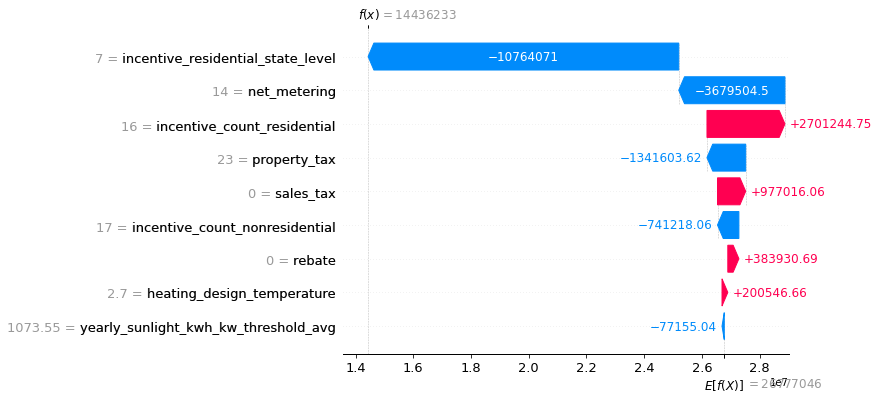

In [15]:
import xgboost
import shap

# train an XGBoost model
#X, y = shap.datasets.boston()
#model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgbc)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

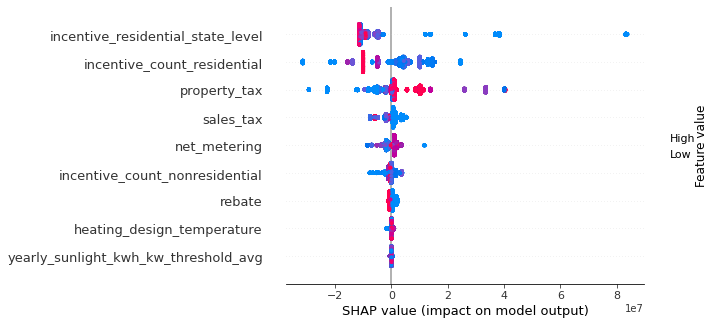

In [16]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

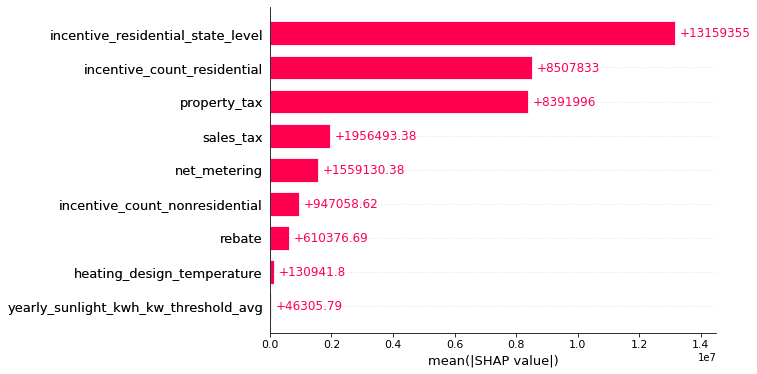

In [17]:
shap.plots.bar(shap_values)

### Conclusion
#### 預測各鄉鎮的電費花費（Electricity_cost_total）主要跟這幾個特徵高度相關
<br>incentive_count_residential (政府獎勵住家安裝太陽能的數量)
<br>incentive_residential_state_level（政府獎勵安裝太陽能的程度）
<br>property_tax（稅金比率）
<br>net_metering（綠能的淨計量電價）
<br>sales_tax （銷售稅）
<br>yearly_sunlight_kwh_kw_threshold_avg （地區前75%最佳的陽光發電度數/KW(千瓦)）
<br>rebate（返利計劃啟動以來的年數） 
<br>incentive_count_nonresidential （政府獎勵非住家安裝太陽能的數量）
<br>heating_design_temperature （加熱系統的溫度）